## IN4080 - Mandatory assignment 1 
### Part 1 - Conditional frequency distributions

a. Question:
Conduction a experiment and occurences of  the words: he, she, her, him as events. Make a table of the conditional frequencies and deliver code and table.
Note: you may use the tools from NLTK or create a Pandas dataframe.  

In [55]:
import nltk
from nltk.corpus import brown
import pandas as pd

genres = ["news", "religion", "government", "fiction", "romance"]
pronouns = ["he", "she", "her", "him"]

cfd = nltk.ConditionalFreqDist(
    (genre, pronoun)
    for genre in genres
    for pronoun in brown.words(categories=genres)
    if pronoun.lower() in pronouns)


pd.DataFrame(cfd)

,news,religion,government,fiction,romance
He,1170,1170,1170,1170,1170
he,2223,2223,2223,2223,2223
him,892,892,892,892,892
She,415,415,415,415,415
she,828,828,828,828,828
her,1162,1162,1162,1162,1162
Her,63,63,63,63,63
Him,43,43,43,43,43


b. Question: 
How does gender vary across genres?

Answer:
We observe that the most frequent pronoun used are he in fiction (813) and romance (702), then her in romance (651) and she in the same genre (496).


c. Question: 
First, consider the complete Brown corpus. Construct a conditional frequency distribution, which
uses gender as condition, and for each gender counts the occurrences of nominative forms (he,
she) and object forms (him, her). Report the results in a two-by-two table. Then calculate the
relative frequency of her from she or her and compare to the relative frequency of him from he
or him. Report the numbers. Submit table, numbers and code you used.


In [56]:
genders = {"Female":["she", "her"], "Male":["he","him"]}
forms = {"Nominative": ["he", "she"], "Object":["her", "him"]}

cfd1 = nltk.ConditionalFreqDist(
    (form, gender)
    for gender,genderLst in genders.items()
    for form, pronouns in forms.items()
    for pronoun in brown.words()
    if pronoun.lower() in pronouns
    if pronoun.lower() in genderLst)



In [57]:
df = pd.DataFrame(cfd1)
df  

,Nominative,Object
Female,2860,3036
Male,9548,2619


In [58]:
print(f"frequency of her from she or her: {df.loc['Female','Object']/df.loc['Female'].sum()}")
print(f"frequency of him from he or him: {df.loc['Male','Object']/df.loc['Male'].sum()}")

frequency of her from she or her: 0.5149253731343284
frequency of him from he or him: 0.21525437659242214


d. Use the tagged Brown corpus to count the occurrences of she, he, her, him as personal pronouns and her, his, hers as possessive pronouns. Report the results in a two-ways table.

In [59]:
genders = {"Female":["she", "her", "hers"], "Male":["he","him", "his"]}
pronouns = {"Personal":["she","he","her","him"], "Possessive":["her","his","hers"]}
tags = {"Personal": ["PPS", "PPO"], "Possessive": ["PP$", "PP$$"]}


cfd2 = nltk.ConditionalFreqDist(
    (pronounName, gender)
    for gender,genderLst in genders.items()
    for pronounName, pronounLst in pronouns.items()
    for tagkey, tagLst in tags.items()
    for pronoun, tag in brown.tagged_words()
    if pronoun.lower() in pronounLst
    if pronoun.lower() in genderLst
    if tag.split("+")[0].split("-")[0] in tagLst
    if tagkey == pronounName)


In [60]:
df1 = pd.DataFrame(cfd2)
df1  

,Personal,Possessive
Female,3967,1945
Male,12165,6994


In [61]:
cfd3 = nltk.ConditionalFreqDist(
    (pronounName, pronoun.lower())
    for gender,genderLst in genders.items()
    for pronounName, pronounLst in pronouns.items()
    for tagkey, tagLst in tags.items()
    for pronoun, tag in brown.tagged_words()
    if pronoun.lower() in pronounLst
    if pronoun.lower() in genderLst
    if tag.split("+")[0].split("-")[0] in tagLst
    if tagkey == pronounName)

In [62]:
df2 = pd.DataFrame(cfd3)
df2 = df2.fillna(0)
df2

,Personal,Possessive
she,2860.0,0.0
her,1107.0,1929.0
he,9546.0,0.0
him,2619.0,0.0
hers,0.0,16.0
his,0.0,6994.0


e. Question: 
What percentage of the feminine personal pronoun occurs in nominative form and in object form? What are the respective percentage for the masculine personal pronoun?


In [63]:
Feminine_personal_pronoun_object = df2['Personal']['her']/(df2['Personal']['her'] + df2['Personal']['she'])
Feminine_personal_pronoun_nominative = df2['Personal']['she']/(df2['Personal']['her'] + df2['Personal']['she'])

print(f"percentage of the feminine personal pronoun occurs in nominative form is {Feminine_personal_pronoun_nominative*100:.2f}%")
print(f"percentage of the feminine personal pronoun occurs in object form is {Feminine_personal_pronoun_object*100:.2f}% \n")

Masculine_personal_pronoun_object = df2['Personal']['him']/(df2['Personal']['he'] + df2['Personal']['him'])
Masculine_personal_pronoun_nominative = df2['Personal']['he'] /(df2['Personal']['he'] + df2['Personal']['him'])

print(f"percentage of the masculine personal pronoun occurs in nominative form is {Masculine_personal_pronoun_nominative*100:.2f}%")
print(f"percentage of the masculine personal pronoun occurs in object form is {Masculine_personal_pronoun_object*100:.2f}%")


percentage of the feminine personal pronoun occurs in nominative form is 72.09%
percentage of the feminine personal pronoun occurs in object form is 27.91% 

percentage of the masculine personal pronoun occurs in nominative form is 78.47%
percentage of the masculine personal pronoun occurs in object form is 21.53%


f. Question:
Illustrate the numbers from (d) with a bar chart.

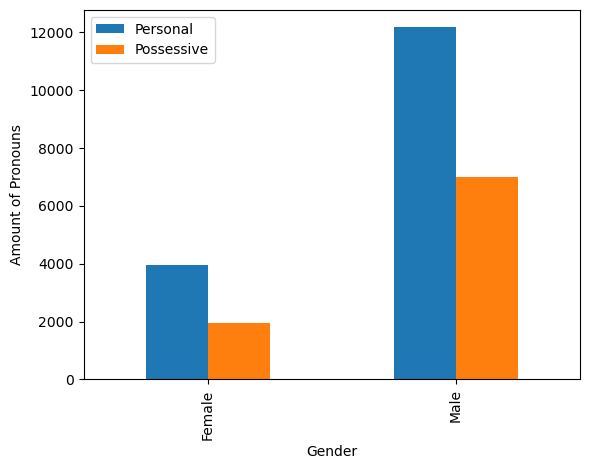

In [64]:
import matplotlib.pyplot as plt
df1.plot.bar()
plt.ylabel("Amount of Pronouns")
plt.xlabel("Gender")
plt.show(block=True)

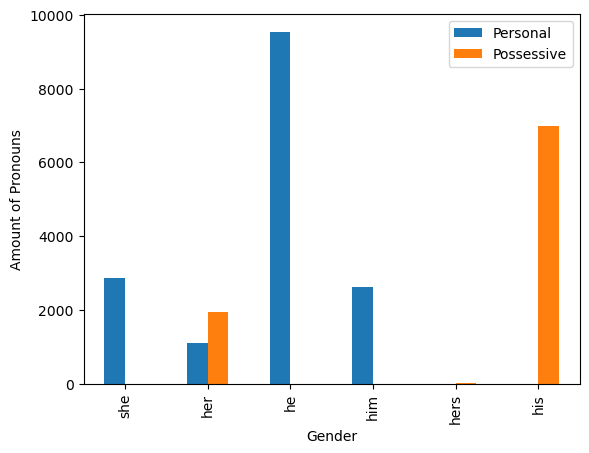

In [65]:
df2.plot.bar()
plt.ylabel("Amount of Pronouns")
plt.xlabel("Gender")
plt.show(block=True)

g. Question:

1. Why do you think the masculine pronoun is more frequent than the feminine pronoun?

2. If you find that there is a different distribution between nominative and object forms for the masculine and the feminine pronouns, why do you think that is the case?

3. Do you see any consequences for the development of language technology in general, and for language technology derived from example texts in particular?


Answer:

Reasons for masculine pronouns being more frequent than the feminine could be that mostly men are the writers of the texts and this causes the writers to use masculine pronouns more to make the texts relatable to themselves. Also, the theme of the texts can affect the use of pronouns. If the text is f.eks. about football the male pronouns will be used more frequently than female. I find that the nominative and object forms for the masculine and feminine pronouns have different distribution as the male nominative and objective pronouns are a lot higher than the female pronouns. Brown corpus was the first representation of the English language, per 1961. This shows womens position in society that time. Language technologists must use either up to date representation of language they use or use another method to develop the technology so that the societal changes is not a factor of bias.



### Part 2 - Zipf's law of abbreviation

Notes:

Zipf's law of frequency: the frequency of a word is roughly proportional to its rank in the frequency list.

zipf's law of abbreviation: the frequency of a word is negatively correlated with its length in characters. i.e. short words tend to be more frequent and long words tend to be rare. 

a. Question:

Load the file and remove parts so that you only use the book text.

In [134]:
from urllib import request
import nltk
nltk.download('punkt')

url = "https://www.gutenberg.org/cache/epub/74/pg74.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
raw = raw.lstrip('\ufeff')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MinaS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [135]:
# Marking the beginning
start_indx = raw.find("THE ADVENTURES OF TOM SAWYER\r\n")   
# rfind (reverse find) helps us get the right index values to use for slicing the string
end_indx = raw.find("*** END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***")
raw = raw[start_indx:end_indx]
len(raw)

401647

b. Question:

Tokenize the text, remove the punctuation marks, and produce a frequency distribution of the word lengths. Format this distribution as Pandas dataframe.

In [136]:
import string

# Tokenization: breaking up the string into words and punctuations
tokens = nltk.word_tokenize(raw, language='english')

#Eliminating numbers and punctuation by filtering any non-alphabetic items
punctuations = string.punctuation

for punc in punctuations:
    try:
        tokens.remove(punc)
    except:
        continue


In [69]:
# Producing frequency distribution of the word length

dict = {}

for word in tokens:
    lenWord = len(word)
    if lenWord not in dict:
        dict.update({lenWord:1})
    else:
        dict[lenWord] +=1

In [70]:
dict # length of word is the key and count is the value

{3: 18873,
 10: 1004,
 2: 11331,
 6: 5427,
 4: 14421,
 5: 7821,
 9: 1734,
 7: 4068,
 8: 2557,
 11: 601,
 21: 2,
 13: 177,
 1: 20192,
 15: 38,
 19: 7,
 20: 4,
 17: 24,
 30: 1,
 16: 36,
 14: 97,
 22: 3,
 12: 310,
 18: 7,
 23: 1}

In [71]:
df2 = pd.DataFrame(dict.items(), columns=["Word Length", "Frequency"])
df2 = df2.sort_values(by="Word Length")
df2 = df2.reset_index(drop=True)
df2

,Word Length,Frequency
0,1,20192
1,2,11331
2,3,18873
3,4,14421
4,5,7821
5,6,5427
6,7,4068
7,8,2557
8,9,1734
9,10,1004


c. Question:

What are the five most frequent word lengths? How long are the longest words of the text?

Answer:

In [72]:
df2[:5]

,Word Length,Frequency
0,1,20192
1,2,11331
2,3,18873
3,4,14421
4,5,7821


These are the five most frequent word lengths. In other words, the most frequent word length is of length 1. The longest words of the text are:

In [73]:
df2.sort_values(by="Word Length", ascending=False)[:5]

,Word Length,Frequency
23,30,1
22,23,1
21,22,3
20,21,2
19,20,4


Longest word has the length 30 and has been used once in the whole text.

d. Question:

Order the table by word length and produce a plot that shows the frequencies.

Answer:


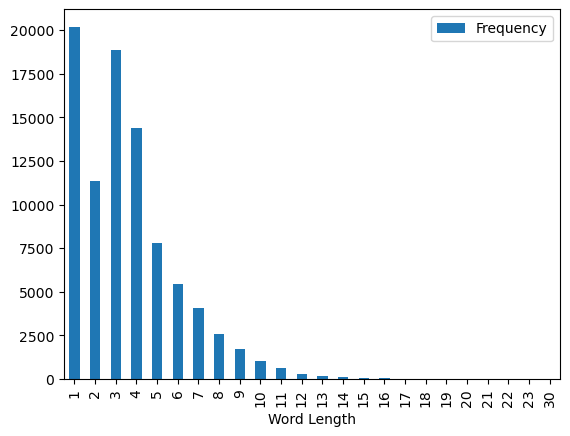

In [74]:
df2_sortWord = df2.sort_values(by="Word Length")
df2_sortWord.plot.bar(x="Word Length", y="Frequency")
plt.show(block=True)

e. Question:

Also produce a visualization with the data ordered by decreasing frequency.

Answer:

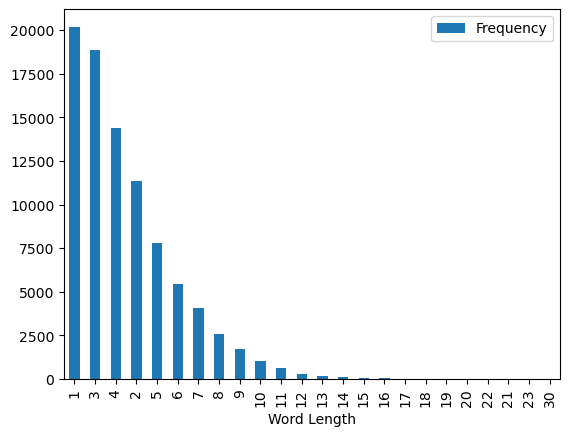

In [75]:
df2_sortFreq = df2.sort_values(by = "Frequency", ascending=False)
df2_sortFreq.plot.bar(x="Word Length", y="Frequency")
plt.show(block=True)

f. Question:

When dealing with word frequency data, it is often recommended to plot frequencies on a logarithmic scale. How does this change the plots?

Answer:

The frequencies will be scaled equally. According to Zipf's law word frequencies tend to follow a straight line in a log-log plot, which is a characteristic og Zipf's law. This is possible to observe in the plot below. The log scaled frequencies almost follow a striaght line compared to non scaled ones.

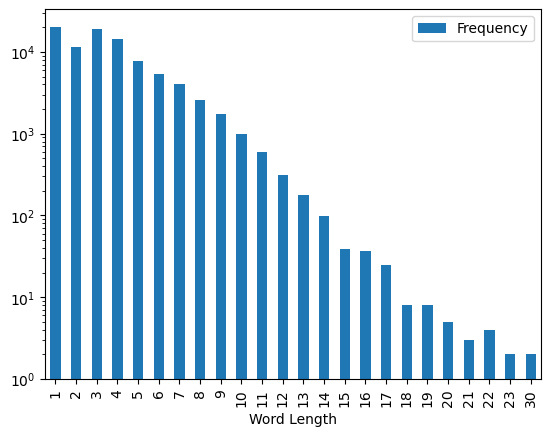

In [76]:
df2_sortWord.plot.bar(x="Word Length", y="Frequency", log=True)
plt.show(block=True)

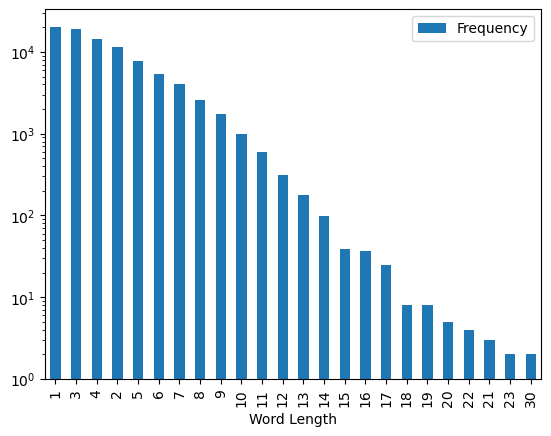

In [77]:

df2_sortFreq.plot.bar(x="Word Length", y="Frequency", log=True)
plt.show(block=True)

g. Question:

How well does this dataset match Zipf's law of abbreviation? In your opinion, whch plot is most suitable to prove or disaprove the law of abbreviation?

Answer:



h. Question:

Select one word length and investigate in detail which words of this word length occur in the text. Are these words specific to the Tom Swayer text, or would you expect them to occur similarly frequently in other English texts? Is there any evidence of preprocessing (e.g. tokenization errors?)

Answer:

For the maximum word length which was 30, we got a word which is included in the prefrace of Tom Swayer book. I will say that this is a word we would only expect to occur in this book, also since it is only included in the prefrace i would consider it as a preprocessing error. 'hop-skip-and-jump—proof'is a word of length 23 which is actually included in the text (not only prefrace), and would rarely occur in other text as a single word (usually would occur as 5 seperate words). 

In [79]:
wordLengths_long = list(df2.sort_values(by = "Word Length")["Word Length"][-3:])
wordLengths_short = list(df2.sort_values(by = "Word Length")["Word Length"][:2])

def word_len_analysis(wordLengths):
    dictWords = {}

    for word in tokens:
        if len(word) in wordLengths:
            if len(word) not in dictWords:
                dictWords.update({len(word) : [word]})
            else:
                dictWords[len(word)].append(word)
    print(dictWords)


In [80]:
#long word lengths

word_len_analysis(wordLengths_long)

{30: ['Self-Examination—Dentistry—The'], 22: ['Investigated—Wonderful', 'Eloquence—Compositions', 'again—aimlessly—simply'], 23: ['hop-skip-and-jump—proof']}


### Part 3 - Identifying dialogue act types in chat messages


In [33]:
import nltk
nltk.download("nps_chat")
from nltk.corpus import nps_chat
import pandas as pd

data = []
for f in nps_chat.fileids():
   posts = nps_chat.xml_posts(f)
   for p in posts:
     data.append((p.get('class'), p.text))
     
df = pd.DataFrame(data, columns=['label', 'text'])
print(df.head(20))


[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\MinaS\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!


         label                                         text
0    Statement               now im left with this gay name
1      Emotion                                           :P
2       System                                         PART
3        Greet                               hey everyone  
4    Statement                                      ah well
5       System                         NICK :10-19-20sUser7
6       Accept                10-19-20sUser7 is a gay name.
7       System  .ACTION gives 10-19-20sUser121 a golf clap.
8      Emotion                                           :)
9       System                                         JOIN
10       Greet                           hi 10-19-20sUser59
11   Statement   26/ m/ ky women that are nice please pm me
12      System                                         JOIN
13      System                                         PART
14   Statement                   there ya go 10-19-20sUser7
15      Reject                          

a. 

• How many distinct labels are there, and how many instances per label?

In [34]:
# number of distinct labels:

Distinc_labels = df['label'].unique()
print(f"There are {len(Distinc_labels)} distinct labels.")

# Number of instances per label
instances = df['label'].value_counts()
print(f"There are number of instances per label are \n {instances}")

There are 15 distinct labels.
There are number of instances per label are 
 label
Statement     3185
System        2632
Greet         1363
Emotion       1106
ynQuestion     550
whQuestion     533
Accept         233
Bye            195
Emphasis       190
Continuer      168
Reject         159
yAnswer        108
nAnswer         72
Clarify         38
Other           35
Name: count, dtype: int64


• Try to understand what the labels mean, looking at some examples if necessary.

In [35]:
df.loc[df['label'] == 'Emphasis']


,label,text
145,Emphasis,i thought of that!
166,Emphasis,10-19-20sUser20 go plan the wedding! :P
167,Emphasis,first warning !!!!!
176,Emphasis,10-19-20sUser136.. get the hell in my freaking...
202,Emphasis,that's such a DIRTY word.
...,...,...
10434,Emphasis,Oh!
10482,Emphasis,"omg,omg,omg Its!Its 11-09-teensUser197!"
10487,Emphasis,11-09-teensUser197!!!!!!!!
10489,Emphasis,11-09-teensUser122!!!!!!!!


In [36]:
df.loc[df['label'] == 'Continuer']

,label,text
22,Continuer,and i dont even know what that means.
41,Continuer,& a head between her legs
78,Continuer,and i don't complain about things being hard v...
88,Continuer,"or a ""ogan"""
183,Continuer,'
...,...,...
10214,Continuer,in this thing
10223,Continuer,And I need to sit on something soft.
10425,Continuer,Amazingness.
10429,Continuer,...3333333


• What is the average message length (in characters)?

In [37]:
df['text'].str.len().mean()

21.910570644459167

• How do these numbers compare to the Movie Reviews corpus used in the last exercise
set?

In [82]:
# Movie reviews average message

from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

movie_reviews.categories()
movie_reviews.fileids('pos')
movie_reviews.raw('pos/cv000_29590.txt')

movie_docs = [(movie_reviews.raw(fileid), label)
              for label in movie_reviews.categories()
                for fileid in movie_reviews.fileids(label)]

df_movie = pd.DataFrame(movie_docs , columns=['text', 'label'])

len_movie = df_movie['text'].str.len().mean()

print(f"the mean length of movies reviews is {len_movie}")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\MinaS\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


the mean length of movies revies is 3893.002



• Explain in a few sentences how these differences may impact the text classification
performance. Which text classification methods or parameter settings do you expect to
be better adapted to the NPS Chat problem?


In [106]:
movie_reviews.categories()

['neg', 'pos']

In [114]:
df_movie[df_movie['label'] == 'neg']

,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",neg
996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
997,the kids in the hall are an acquired taste . \...,neg
998,there was a time when john carpenter was a gre...,neg



Movie reviews has binary labels while NPS has multiple labels thus it uses multinomial distribution to predict the labels which makes the predictions more accurate than binary classification. While length of the movie reviews charachers is 3893 which is alot more than NPS length. This means that Movie Reviews is easier to predict and more accurate as it contains more data and only binary labels, while NPS contains less data with multiple labels which makes the prediction not as accurate and easy.

• Split the data into training and test data. To simplify things, we will just use a two-way split of
90% training data and 10% test data in this first experiment.

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.1)

• Instantiate a CountVectorizer with default parameters and fit it to the training data.



In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_bow = cv.fit_transform(x_train)


• Instantiate a MultinomialNB model and fit it to the training data.

• Predict the test set labels using the trained model and display the classification report.

In [41]:
# training a multinomial Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_bow, y_train)

# Predicting 
x_test_bow = cv.transform(x_test)
predicted_y_test = nb.predict(x_test_bow)

# evaluating model 
# Compare predictions with gold labels of validation set

from sklearn import metrics
acc=metrics.accuracy_score(y_test, predicted_y_test)

# Accuracy score
print(acc)

# classification report
print(metrics.classification_report(y_test, predicted_y_test))


0.7076631977294229
              precision    recall  f1-score   support

      Accept       1.00      0.10      0.17        21
         Bye       1.00      0.05      0.10        19
     Clarify       0.00      0.00      0.00         6
   Continuer       0.00      0.00      0.00        15
     Emotion       0.86      0.63      0.73       111
    Emphasis       0.00      0.00      0.00        11
       Greet       0.69      0.96      0.80       138
       Other       0.00      0.00      0.00         5
      Reject       0.00      0.00      0.00        17
   Statement       0.55      0.85      0.67       312
      System       0.93      0.96      0.95       255
     nAnswer       0.00      0.00      0.00         8
  whQuestion       0.89      0.28      0.42        61
     yAnswer       0.00      0.00      0.00        14
  ynQuestion       0.75      0.23      0.36        64

    accuracy                           0.71      1057
   macro avg       0.45      0.27      0.28      1057
weighte

c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# confusion matrix C is such that C_i,j is equal to the number of observations known
# to be in group i and predicted to be in group j.
# i = row  , j = col

print(metrics.confusion_matrix(y_test, predicted_y_test))

[[  2   0   0   0   0   0   0   0   0  17   2   0   0   0   0]
 [  0   1   0   0   0   0  10   0   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0  14   0   0   0   0   0]
 [  0   0   0   0  70   0   6   0   0  35   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0  10   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   0   4   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   1   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0  13   1   0   0   0   1]
 [  0   0   0   0   6   0  25   0   0 265  11   0   2   0   3]
 [  0   0   0   0   1   0   3   0   0   5 246   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   4   2   0   0   0   0]
 [  0   0   0   0   1   0   5   0   0  37   0   0  17   0   1]
 [  0   0   0   0   1   0   1   0   0  12   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0  44   0   0   0   0  15]]


b. Question:

Which classes are the easiest / most difficult to
predict? Are there classes where precision differs drastically from recall, and if so, what does this
mean?

To analyse which classes are the easiest or most difficult to predict we use precision, recall and f1-score in the classification report. 


Theory: 


Precision = True positive/ (True positive + False positive)

Recall = True positive/ (True positive + False negative)

f1 = (2 * precision * recall) / (precision + recall)

There are classes where precision differs drastically from recall. 

precision = how many of what we found are what we wanted to find.
recall = How many things that we wanted to find are from that class (are actually what we wanted to find). 

Sometimes precision is more important than recall, f.eks. in identifying spam mails.


Analysis:

Classes that  are most difficult to predict are Clarify, Continuer, Emphasis, Other, Reject, nAnswer and y_Answer. Since they got a f1-score = 0. f1-score = 1 indicates correctly classified labels. The ones that are easy to predict are System, Greet and Statement.

 In this case, we have classes where precision differs drastically from recall. An example is "Accept" and "Bye". They have lower recall value than the precision, this means that the labels that are predicted are from correct class but not all of the data labels from the same class are correctly predicted. Thus the easiest predicted classes are 



c. Produce the cross-validation scores with the initial Naïve Bayes model

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, x_train_bow, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))


0.704 accuracy with a standard deviation of 0.009


d. By default, the CountVectorizer lowercases all input and uses a simple whitespace-based
tokenizer. Check if other settings provide better results. Note that NLTK provides a
TweetTokenizer which might work best for user-generated content.

In [44]:
print(str(df['text']))

0               now im left with this gay name
1                                           :P
2                                         PART
3                               hey everyone  
4                                      ah well
                         ...                  
10562                      hi 11-09-teensUser3
10563                                     JOIN
10564                  Hi, 11-09-teensUser197.
10565    Not that I know of, 11-09-teensUser98
10566                                      Uh.
Name: text, Length: 10567, dtype: object


In [119]:
from nltk.tokenize import TweetTokenizer

# TweetTokenizer

tknzr = TweetTokenizer()
cv_tknzr = CountVectorizer(tokenizer = tknzr.tokenize)

x_train_bow_tknzr =cv_tknzr.fit_transform(x_train)

nb.fit(x_train_bow_tknzr, y_train)

scores = cross_val_score(nb, x_train_bow_tknzr, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))


c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.654 accuracy with a standard deviation of 0.003


The TweetTokenizer gave better accuracy for the data points.

e. By default (and as its name implies), the CountVectorizer produces frequency counts. Evaluate the impact of binary feature values (presence or absence of a word in an instance). There is a second way to include binary features, namely by using the BernoulliNB model instead of the MultinomialNB one. What is the difference between the binary multinomial model and the Bernoulli model (both in terms of scores and theoretically)?

Answer:

Bernoulli gave worse results than the multinomial. The bernoulli only uses binary features, therefore multinomial is better at predicting the labels as it uses multiple labels

In [122]:
from sklearn.naive_bayes import BernoulliNB

cv_binary =  CountVectorizer(binary = True)
br = BernoulliNB()

#br.fit(x_train_bow, y_train)

#x_test_bow = cv_binary.transform(x_test)
#predicted_y_test = nb.predict(x_test_bow)

scores = cross_val_score(br, x_train_bow, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))


0.632 accuracy with a standard deviation of 0.007


f. We know that Logistic Regression may produce better results than Naive Bayes. We will see what happens if we use Logistic Regression instead of Naive Bayes on this task. Keep the same CountVectorizer as before and replace the Naïve Bayes classifier by a Logistic Regression one with default parameters:


In [124]:
from sklearn.linear_model import LogisticRegression

x_train_bow =cv_binary.fit_transform(x_train)

logreg = LogisticRegression(max_iter=500)

#logreg.fit(x_train_bow, y_train)

#x_test_bow = cv_binary.transform(x_test)
#predicted_y_test = logreg.predict(x_test_bow)

#print(metrics.accuracy_score(y_test, predicted_y_test))

scores = cross_val_score(logreg, x_train_bow, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

0.779 accuracy with a standard deviation of 0.004


g. Evaluate different regularization settings (L2, L1, different values of C). The supported types of regularization depend on the Solver used for gradient descent.

In [125]:
C_max = 20


for c in range(1, C_max, 1):
    c = c/10
    logreg = LogisticRegression(C = c, max_iter=500)

    #logreg.fit(x_train_bow, y_train)

    #x_test_bow = cv_binary.transform(x_test)
    #predicted_y_test = logreg.predict(x_test_bow)
    scores = cross_val_score(logreg, x_train_bow, y_train, cv=5)

    print(f"for C:{c}:")
    print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))


for C:0.1:
0.727 accuracy with a standard deviation of 0.006
for C:0.2:
0.751 accuracy with a standard deviation of 0.005
for C:0.3:
0.760 accuracy with a standard deviation of 0.007
for C:0.4:
0.766 accuracy with a standard deviation of 0.005
for C:0.5:
0.770 accuracy with a standard deviation of 0.005
for C:0.6:
0.775 accuracy with a standard deviation of 0.005
for C:0.7:
0.777 accuracy with a standard deviation of 0.005
for C:0.8:
0.778 accuracy with a standard deviation of 0.005
for C:0.9:
0.779 accuracy with a standard deviation of 0.005
for C:1.0:
0.779 accuracy with a standard deviation of 0.004
for C:1.1:
0.780 accuracy with a standard deviation of 0.003
for C:1.2:
0.781 accuracy with a standard deviation of 0.002
for C:1.3:
0.781 accuracy with a standard deviation of 0.003
for C:1.4:
0.780 accuracy with a standard deviation of 0.003
for C:1.5:
0.780 accuracy with a standard deviation of 0.003
for C:1.6:
0.779 accuracy with a standard deviation of 0.003
for C:1.7:
0.779 accurac

In [129]:

logreg = LogisticRegression(penalty='l1', solver='liblinear')

#logreg.fit(x_train_bow, y_train)

#x_test_bow = cv_binary.transform(x_test)
#predicted_y_test = logreg.predict(x_test_bow)

scores = cross_val_score(logreg, x_train_bow, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

0.772 accuracy with a standard deviation of 0.004


In [130]:
logreg = LogisticRegression(penalty='l2', solver='saga', max_iter=500)

#logreg.fit(x_train_bow, y_train)

#x_test_bow = cv_binary.transform(x_test)
#predicted_y_test = logreg.predict(x_test_bow)

scores = cross_val_score(logreg, x_train_bow, y_train, cv=5)
print("{:.3f} accuracy with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

0.778 accuracy with a standard deviation of 0.004


h. Retrain the best model on the entire training set and evaluate it on the test set. Report the detailed evaluation scores and compare them with the initial Naïve Bayes scores. On which classes did your model improve the most? Which classes are still difficult to predict?

The model with best result was logistic regression with C:1.2 which got 0.781 accuracy with a standard deviation of 0.002. Evaluating it on the test set we get the accuracy: 0.79. The classes that improved the most are all of the classes excluding Clarify, Emphasis, Other as they remained the same and are still difficult to predict.

In [133]:
logreg = LogisticRegression(C = 1.2, max_iter=500)
x_train_bow_log =cv_binary.fit_transform(x_train)
logreg.fit(x_train_bow_log, y_train)

x_test_bow = cv_binary.transform(x_test)
predicted_y_test = logreg.predict(x_test_bow)
print(metrics.classification_report(y_test, predicted_y_test))

              precision    recall  f1-score   support

      Accept       0.60      0.57      0.59        21
         Bye       1.00      0.53      0.69        19
     Clarify       0.00      0.00      0.00         6
   Continuer       0.20      0.07      0.10        15
     Emotion       0.81      0.68      0.74       111
    Emphasis       0.00      0.00      0.00        11
       Greet       0.96      0.92      0.94       138
       Other       0.00      0.00      0.00         5
      Reject       0.38      0.18      0.24        17
   Statement       0.63      0.89      0.74       312
      System       1.00      0.97      0.98       255
     nAnswer       0.50      0.25      0.33         8
  whQuestion       0.92      0.75      0.83        61
     yAnswer       0.73      0.57      0.64        14
  ynQuestion       0.66      0.33      0.44        64

    accuracy                           0.79      1057
   macro avg       0.56      0.45      0.48      1057
weighted avg       0.78   

c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MinaS\Anaconda3\envs\in4080_2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
